# Business Bank D&A
# Data Science Workshop 1.1 : Improving Model Performance

<img src = "https://miro.medium.com/max/1400/1*RiEfzta7FkYiRq44jhSb7g.png" width = "650" >


## California Housing Data Example:

Can we prededict the median value of houses in each suburb based on various features?

#### Improving Model Performance:

1. Can we improve the way we handle missing values?
2. Can we identify and remove outliers from the data?
3. Can we induce linear relationships between the input features and the results?

In [450]:
#import dependencies

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

#import ML Libraries

from sklearn.tree import DecisionTreeRegressor, plot_tree  
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score

In [451]:
housing = pd.read_csv(r'C:\Users\CP352846\OneDrive - Capitec Bank Ltd\Data Science\DS Workshops\Workshop 1\california_housing.csv', usecols = ['longitude', 'latitude','total_rooms', 'median_income','ocean_proximity', 'median_house_value'])
housing.sample(10)

,longitude,latitude,total_rooms,median_income,ocean_proximity,median_house_value
14703,-117.07,32.80,2698.0,5.1782,<1H OCEAN,195100
4384,-118.27,34.09,3646.0,2.9709,<1H OCEAN,225000
11308,-117.93,33.77,3157.0,4.5833,<1H OCEAN,190700
3481,-118.52,34.30,4542.0,8.8467,<1H OCEAN,450700
7193,-118.19,34.03,1346.0,1.7995,<1H OCEAN,153400
19071,-122.53,38.32,3577.0,5.7950,<1H OCEAN,332300
8234,-118.20,33.77,517.0,2.2250,NEAR OCEAN,106300
6180,-117.92,34.08,1860.0,3.5536,<1H OCEAN,207000
7712,-118.15,33.96,2418.0,3.1083,<1H OCEAN,285500
20441,-118.78,34.26,4072.0,6.0487,<1H OCEAN,254500


### Recreating Our Previous Model as a Benchmark
#### 1. Data Preparation
    1. Remove Blank Records.
    2. All Categorical Variables need to be encoded as numerical variables.
   

In [452]:
housing.dropna(inplace = True)
housing.reset_index(inplace=True)


# One hot encoding
ohe = OneHotEncoder(categories='auto')
Xd = ohe.fit_transform(housing.ocean_proximity.values.reshape(-1, 1)).toarray()
df_ohe = pd.DataFrame(Xd, columns = ohe.get_feature_names_out())

# Add encoded feature to the dataframe
housing_for_model = housing.join(df_ohe)
housing_for_model.sample(10)


,index,longitude,latitude,total_rooms,median_income,ocean_proximity,median_house_value,x0_<1H OCEAN,x0_INLAND,x0_ISLAND,x0_NEAR BAY,x0_NEAR OCEAN
2022,2025,-119.74,36.71,5872.0,2.1905,INLAND,61800,0.0,1.0,0.0,0.0,0.0
5077,5080,-118.30,33.98,2010.0,1.6611,<1H OCEAN,95800,1.0,0.0,0.0,0.0,0.0
18831,18839,-122.73,41.76,2200.0,2.5357,INLAND,94200,0.0,1.0,0.0,0.0,0.0
18586,18594,-122.09,37.11,2637.0,3.6474,NEAR OCEAN,231600,0.0,0.0,0.0,0.0,1.0
19204,19212,-122.71,38.45,2739.0,2.9663,<1H OCEAN,185400,1.0,0.0,0.0,0.0,0.0
1313,1316,-121.80,38.00,2738.0,3.5368,INLAND,122500,0.0,1.0,0.0,0.0,0.0
13200,13203,-117.68,34.05,1859.0,2.5395,INLAND,187500,0.0,1.0,0.0,0.0,0.0
19275,19283,-122.73,38.40,3689.0,2.9750,<1H OCEAN,157300,1.0,0.0,0.0,0.0,0.0
10545,10548,-117.77,33.70,3636.0,5.5464,<1H OCEAN,207500,1.0,0.0,0.0,0.0,0.0
15995,15998,-122.47,37.75,3238.0,6.1592,NEAR BAY,381700,0.0,0.0,0.0,1.0,0.0


#### 2. Model Training:

In [453]:
#split data into train and test set:
housing_for_model = housing_for_model.dropna()
y = (housing_for_model.iloc[:,6:7])
x = (housing_for_model[['longitude', 'latitude', 'total_rooms', 'median_income', 'x0_NEAR BAY','x0_<1H OCEAN','x0_INLAND','x0_NEAR OCEAN','x0_ISLAND']])


x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 0)




In [454]:
# Fit Decision Tree

regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(x_train, y_train)

DecisionTreeRegressor(random_state=0)

#### 3. Model Assesment


In [455]:
y_pred = regressor.predict(x_test)
mse2 = mean_squared_error(y_test, y_pred)
test_score2 = r2_score(y_test, y_pred)
print('MSE Score: {:2.2}'.format(mse2))
print("R Squared score of the optimal tree = {:2.2%}".format(test_score2))

MSE Score: 4.3e+09
R Squared score of the optimal tree = 67.26%


Our previous model achieved an R-squared score of 67.26%. By applying the feature engineering techniques listed above, we will try to improve the value of the R-squared statistic. 

### 1. Missing Value Handling:

In our first iteration of the model, we simply dropped all the records which had missing data. 

Instead of simply removing these variables, we will replace the missing values with the median value for each numeric variable and the mode for each categorical variable.

In [493]:
# Reload the dataset

housing = pd.read_csv(r'C:\Users\CP352846\OneDrive - Capitec Bank Ltd\Data Science\DS Workshops\Workshop 1\california_housing.csv', usecols = ['longitude', 'latitude','total_rooms', 'median_income','ocean_proximity', 'median_house_value'])

housing.sample(10)

,longitude,latitude,total_rooms,median_income,ocean_proximity,median_house_value
101,-122.25,37.81,5806.0,3.2177,NEAR BAY,273400
9008,-118.60,34.08,866.0,6.9100,<1H OCEAN,380000
12672,-121.42,38.48,7880.0,1.9657,INLAND,116000
10448,-117.67,33.47,2728.0,1.6393,<1H OCEAN,500001
12080,-117.53,33.83,2191.0,5.5362,INLAND,195600
5456,-118.47,34.00,1235.0,2.7143,<1H OCEAN,287500
10248,-117.86,33.89,2002.0,6.9612,<1H OCEAN,274500
7906,-118.10,33.86,3052.0,4.3397,<1H OCEAN,268100
16773,-122.48,37.69,2661.0,4.2421,NEAR OCEAN,257500
11757,-121.18,38.75,2807.0,4.7941,INLAND,247600


#### Asses Missing Data:

Text(0, 0.5, '% of Data Missing')

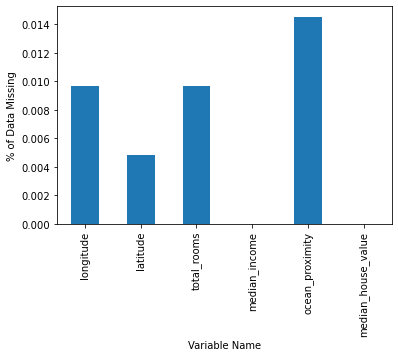

In [494]:
missing = housing.isnull().mean()*100

missing.plot.bar()
plt.xlabel('Variable Name')
plt.ylabel('% of Data Missing')

#### Impute Missing Value Replacement

In [495]:
#Categorical Variables

mode = housing.ocean_proximity.mode()[0]
housing['ocean_proximity'] = housing['ocean_proximity'].fillna(mode)

#Numeric Variables

numeric = ['longitude', 'latitude', 'total_rooms', 'median_income']

for var in numeric:
    median = housing[var].median()
    housing[var] = housing[var].fillna(mean)


#### Ensure There Are No Remaining Missing Values

Text(0, 0.5, '% of Data Missing')

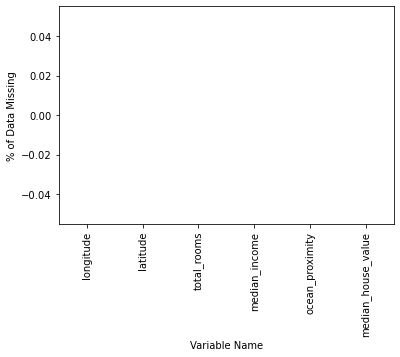

In [496]:
missing = housing.isnull().mean()*100

missing.plot.bar()
plt.xlabel('Variable Name')
plt.ylabel('% of Data Missing')

#### Refit Decision Tree Model and Assess Results:

In [513]:
# One hot encoding
ohe = OneHotEncoder(categories='auto')
Xd = ohe.fit_transform(housing.ocean_proximity.values.reshape(-1, 1)).toarray()
df_ohe = pd.DataFrame(Xd, columns = ohe.get_feature_names_out())

# Add encoded feature to the dataframe
housing_for_model = housing.join(df_ohe)
housing_for_model.sample(10)

,index,longitude,latitude,total_rooms,median_income,ocean_proximity,median_house_value,ocean_proximity_encode,x0_<1H OCEAN,x0_INLAND,x0_ISLAND,x0_NEAR BAY,x0_NEAR OCEAN
3218,3218,-119.68,36.32,592.0,1.7596,INLAND,120800,124805.392001,0.0,1.0,0.0,0.0,0.0
10784,10784,-117.91,33.63,1901.0,2.7264,<1H OCEAN,311100,240070.062596,1.0,0.0,0.0,0.0,0.0
485,485,-122.26,37.86,5161.0,1.6307,NEAR BAY,253600,259289.512451,0.0,0.0,0.0,1.0,0.0
8057,8057,-118.19,33.85,1073.0,3.8026,NEAR OCEAN,149700,249427.102747,0.0,0.0,0.0,0.0,1.0
20344,20344,-119.06,34.23,3511.0,3.0219,<1H OCEAN,221700,240070.062596,1.0,0.0,0.0,0.0,0.0
12361,12361,-116.48,33.84,5480.0,1.7204,INLAND,137500,124805.392001,0.0,1.0,0.0,0.0,0.0
639,639,-122.15,37.72,1190.0,3.3750,NEAR BAY,198300,259289.512451,0.0,0.0,0.0,1.0,0.0
14647,14647,-117.19,32.77,634.0,3.8571,NEAR OCEAN,143800,249427.102747,0.0,0.0,0.0,0.0,1.0
17199,17199,-119.78,34.48,2377.0,7.9248,NEAR OCEAN,500001,249427.102747,0.0,0.0,0.0,0.0,1.0
11442,11442,-117.98,33.72,2826.0,6.0494,<1H OCEAN,240400,240070.062596,1.0,0.0,0.0,0.0,0.0


In [498]:
#split data into train and test set:
#housing_for_model = housing_for_model.dropna()
y = (housing_for_model.iloc[:,5:6])
x = (housing_for_model[['longitude', 'latitude', 'total_rooms', 'median_income', 'x0_NEAR BAY','x0_<1H OCEAN','x0_INLAND','x0_NEAR OCEAN','x0_ISLAND']])

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 0)


# Fit Model
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(x_train, y_train)


y_pred = regressor.predict(x_test)
mse2 = mean_squared_error(y_test, y_pred)
test_score2 = r2_score(y_test, y_pred)
print('MSE Score: {:2.2}'.format(mse2))
print("R Squared score of the optimal tree = {:2.2%}".format(test_score2))

MSE Score: 4.5e+09
R Squared score of the optimal tree = 66.55%


Benchmark R-Squared: 67.26% 

Median Imputation R-Squred: 66.55%

**The result above shows that by changing the way in which we handle missing data, we have actually decreased the accuary of the model.**

**While on its own this step has not improved the performance of the model, it will still be important for later on when we build our feature engineering pipleline**

### 2. Outlier Handling

We will identify outliers in our data set using the inter-quartile range method:

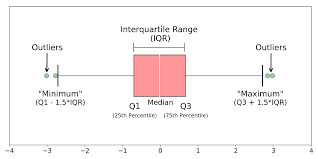

Then we will replace the outliers with the lower/upper bound of the IQR method.

In [483]:
housing = pd.read_csv(r'C:\Users\CP352846\OneDrive - Capitec Bank Ltd\Data Science\DS Workshops\Workshop 1\california_housing.csv', usecols = ['longitude', 'latitude','total_rooms', 'median_income','ocean_proximity', 'median_house_value'])

housing.dropna(inplace = True)
housing.reset_index(inplace = True)

#### Identify Number of Outliers for Each Variable:

In [484]:
numeric = ['longitude', 'latitude', 'total_rooms', 'median_income']

for var in numeric:
    iqr = housing[var].quantile(0.75) - housing[var].quantile(0.25)
    upper_bound = housing[var].quantile(0.75) + 1.5 * iqr
    lower_bound = housing[var].quantile(0.25) -1.5 * iqr
    
    upper_outliers = len(housing[housing[var] > upper_bound])
    lower_outliers = len(housing[housing[var] < lower_bound])
    
    print('Variable: ' + var)
    print(f'Upper Outliers: {upper_outliers}')
    print(f'Lower Outliers: {lower_outliers} ')
    print("\n")

Variable: longitude
Upper Outliers: 0
Lower Outliers: 0 


Variable: latitude
Upper Outliers: 0
Lower Outliers: 0 


Variable: total_rooms
Upper Outliers: 1287
Lower Outliers: 0 


Variable: median_income
Upper Outliers: 680
Lower Outliers: 0 




Only the variables _total_rooms_ and _median_income_ have outliers above the upper bound. We will now replace these values with the value of the upper bound. 

In [485]:
outliers = ['total_rooms', 'median_income']

for var in outliers:
    iqr = housing[var].quantile(0.75) - housing[var].quantile(0.25)
    upper_bound = housing[var].quantile(0.75) + 1.5 * iqr    
    
    housing[var] = np.where(housing[var] > upper_bound, upper_bound, housing[var])
    
    upper_outliers = len(housing[housing[var] > upper_bound])
    
    print('Variable: ' + var)
    print(f'Upper Outliers: {upper_outliers}')
    print(f'Lower Outliers: {0} ')
    print("\n")

Variable: total_rooms
Upper Outliers: 0
Lower Outliers: 0 


Variable: median_income
Upper Outliers: 0
Lower Outliers: 0 




We can see that all of the outliers have been removed from the dataset. Next lets refit the decision tree and see if the removal of outliers has improved the performance of the model. 

In [486]:
# One hot encoding
ohe = OneHotEncoder(categories='auto')
Xd = ohe.fit_transform(housing.ocean_proximity.values.reshape(-1, 1)).toarray()
df_ohe = pd.DataFrame(Xd, columns = ohe.get_feature_names_out())

# Add encoded feature to the dataframe
housing_for_model = housing.join(df_ohe)
housing_for_model.sample(10)

#split data into train and test set:
#housing_for_model = housing_for_model.dropna()
y = (housing_for_model.iloc[:,6:7])
x = (housing_for_model[['longitude', 'latitude', 'total_rooms', 'median_income', 'x0_NEAR BAY','x0_<1H OCEAN','x0_INLAND','x0_NEAR OCEAN','x0_ISLAND']])

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 0)



# Fit Model with Optimized parameters
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(x_train, y_train)


y_pred = regressor.predict(x_test)
mse2 = mean_squared_error(y_test, y_pred)
test_score2 = r2_score(y_test, y_pred)
print('MSE Score: {:2.2}'.format(mse2))
print("R Squared score of the optimal tree = {:2.2%}".format(test_score2))


MSE Score: 4.3e+09
R Squared score of the optimal tree = 67.65%


**The result above shows that by improving the way in which we handle outliers, we have been able improve the R-squared statistic by almost 0.5%.**

### 3. Replace the Categorical Variables using Mean Value Encoding

Previously we have used a technique called OneHot Encoding to input categorical variables into the model. This technique involes creating a new binary field in the data for each value in the categorical field, indicating if the record falls into that specific category:  

In [467]:
housing = pd.read_csv(r'C:\Users\CP352846\OneDrive - Capitec Bank Ltd\Data Science\DS Workshops\Workshop 1\california_housing.csv', usecols = ['longitude', 'latitude','total_rooms', 'median_income','ocean_proximity', 'median_house_value'])

housing.dropna(inplace = True)
housing.reset_index(inplace=True)

ohe = OneHotEncoder(categories='auto')
Xd = ohe.fit_transform(housing.ocean_proximity.values.reshape(-1, 1)).toarray()
df_ohe = pd.DataFrame(Xd, columns = ohe.get_feature_names_out())

# Add encoded feature to the dataframe
housing_for_model = housing.join(df_ohe)
housing_for_model.sample(10)

,index,longitude,latitude,total_rooms,median_income,ocean_proximity,median_house_value,x0_<1H OCEAN,x0_INLAND,x0_ISLAND,x0_NEAR BAY,x0_NEAR OCEAN
1946,1949,-120.86,38.75,1533.0,2.5625,INLAND,146100,0.0,1.0,0.0,0.0,0.0
16029,16032,-122.45,37.72,1773.0,4.4750,NEAR BAY,221200,0.0,0.0,0.0,1.0,0.0
4525,4528,-118.22,34.04,798.0,1.4189,<1H OCEAN,141700,1.0,0.0,0.0,0.0,0.0
14687,14690,-117.09,32.80,2163.0,4.7188,NEAR OCEAN,174100,0.0,0.0,0.0,0.0,1.0
11055,11058,-117.86,33.78,2713.0,2.6959,<1H OCEAN,178800,1.0,0.0,0.0,0.0,0.0
11130,11133,-117.93,33.85,2147.0,3.2188,<1H OCEAN,196900,1.0,0.0,0.0,0.0,0.0
11943,11946,-117.43,33.93,1273.0,2.4922,INLAND,109400,0.0,1.0,0.0,0.0,0.0
3274,3277,-122.91,39.03,2374.0,1.3532,INLAND,95800,0.0,1.0,0.0,0.0,0.0
19007,19015,-121.97,38.35,5678.0,3.7388,INLAND,122000,0.0,1.0,0.0,0.0,0.0
5812,5815,-118.25,34.14,5980.0,2.5060,<1H OCEAN,184500,1.0,0.0,0.0,0.0,0.0


Instead of using the OneHot Encoding technique for the categorical variable, we will replace the value of the categorical variable with the **mean of the _median_house_price_** for that category. 

In [468]:
#Create a dictionary mapping ocean proximity category to its median home value
ocean_prox = housing.groupby(['ocean_proximity'])['median_house_value'].mean().to_dict()
ocean_prox 

{'<1H OCEAN': 240078.65469673747,
 'INLAND': 124805.39200122119,
 'ISLAND': 380440.0,
 'NEAR BAY': 259362.48097944906,
 'NEAR OCEAN': 249316.76534839923}

In [469]:
#Add a field to the dataframe with the new encoded variable
housing['ocean_proximity_encode'] = housing['ocean_proximity'].map(ocean_prox)
housing

,index,longitude,latitude,total_rooms,median_income,ocean_proximity,median_house_value,ocean_proximity_encode
0,0,-122.23,37.88,880.0,8.3252,NEAR BAY,452600,259362.480979
1,1,-122.22,37.86,7099.0,8.3014,NEAR BAY,358500,259362.480979
2,2,-122.24,37.85,1467.0,7.2574,NEAR BAY,352100,259362.480979
3,3,-122.25,37.85,1274.0,5.6431,NEAR BAY,341300,259362.480979
4,4,-122.25,37.85,1627.0,3.8462,NEAR BAY,342200,259362.480979
...,...,...,...,...,...,...,...,...
20627,20635,-121.09,39.48,1665.0,1.5603,INLAND,78100,124805.392001
20628,20636,-121.21,39.49,697.0,2.5568,INLAND,77100,124805.392001
20629,20637,-121.22,39.43,2254.0,1.7000,INLAND,92300,124805.392001
20630,20638,-121.32,39.43,1860.0,1.8672,INLAND,84700,124805.392001


Text(0, 0.5, 'mean of Median House Value')

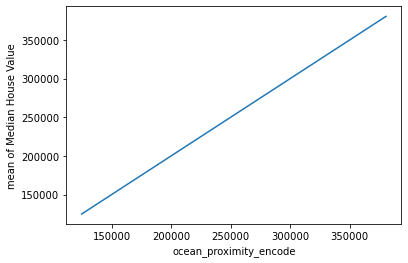

In [470]:
#Asses the linear relationship between ocean_proximity_encode and median_house_value

housing.groupby(['ocean_proximity_encode'])['median_house_value'].mean().plot.line()
plt.ylabel('mean of Median House Value')

In [471]:
# One hot encoding
ohe = OneHotEncoder(categories='auto')
Xd = ohe.fit_transform(housing.ocean_proximity.values.reshape(-1, 1)).toarray()
df_ohe = pd.DataFrame(Xd, columns = ohe.get_feature_names_out())

# Add encoded feature to the dataframe
housing_for_model = housing.join(df_ohe)
housing_for_model.sample(10)

#split data into train and test set:
#housing_for_model = housing_for_model.dropna()
y = (housing_for_model.iloc[:,6:7])
x = (housing_for_model[['longitude', 'latitude', 'total_rooms', 'median_income', 'ocean_proximity_encode']])

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 0)


# Fit Model with Optimized parameters
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(x_train, y_train)


y_pred = regressor.predict(x_test)
mse2 = mean_squared_error(y_test, y_pred)
test_score2 = r2_score(y_test, y_pred)
print('MSE Score: {:2.2}'.format(mse2))
print("R Squared score of the optimal tree = {:2.2%}".format(test_score2))

MSE Score: 4.3e+09
R Squared score of the optimal tree = 67.72%


### Apply All Steps to The Data and Assess The Results

In [511]:
housing = pd.read_csv(r'C:\Users\CP352846\OneDrive - Capitec Bank Ltd\Data Science\DS Workshops\Workshop 1\california_housing.csv', usecols = ['longitude', 'latitude','total_rooms', 'median_income','ocean_proximity', 'median_house_value'])

######replace missing values with median/mode#####

#Categorical Variables

mode = housing.ocean_proximity.mode()[0]
housing['ocean_proximity'] = housing['ocean_proximity'].fillna(mode)

#Numeric Variables

numeric = ['longitude', 'latitude', 'total_rooms', 'median_income']

for var in numeric:
    median = housing[var].median()
    housing[var] = housing[var].fillna(median)

housing.dropna(inplace = True)
housing.reset_index(inplace=True)
    
######replace outliers using the IQR method#####

outliers = ['total_rooms', 'median_income']

for var in outliers:
    iqr = housing[var].quantile(0.75) - housing[var].quantile(0.25)
    upper_bound = housing[var].quantile(0.75) + 1.5 * iqr    
    
    housing[var] = np.where(housing[var] > upper_bound, upper_bound, housing[var])
    
######Encode Categorical Variables with Mean of Result#####

    
ocean_prox = housing.groupby(['ocean_proximity'])['median_house_value'].mean().to_dict()
housing['ocean_proximity_encode'] = housing['ocean_proximity'].map(ocean_prox)

housing.sample(10)

,index,longitude,latitude,total_rooms,median_income,ocean_proximity,median_house_value,ocean_proximity_encode
6124,6124,-117.90,34.11,4776.0,2.1667,<1H OCEAN,142600,240070.062596
18853,18853,-122.28,41.38,5266.0,2.8036,INLAND,110100,124805.392001
6193,6193,-117.90,34.09,1562.0,4.1250,<1H OCEAN,220800,240070.062596
6606,6606,-118.13,34.19,2203.0,4.0714,INLAND,234000,124805.392001
14490,14490,-117.24,32.85,3117.0,6.7587,NEAR OCEAN,388500,249427.102747
2494,2494,-120.19,36.60,875.0,1.5536,INLAND,58300,124805.392001
15091,15091,-116.93,32.80,1867.0,2.0685,<1H OCEAN,130000,240070.062596
9942,9942,-122.23,38.17,350.0,1.8942,NEAR BAY,216700,259289.512451
9737,9737,-121.76,36.77,1608.0,2.3384,<1H OCEAN,121000,240070.062596
9244,9244,-120.05,36.98,3705.0,2.5288,INLAND,61800,124805.392001


#### Fit Model and Assess Results:

We will also use a gridsearch to find the optimal model tuning parameters in order to improve our accuracy.

In [515]:
# One hot encoding
ohe = OneHotEncoder(categories='auto')
Xd = ohe.fit_transform(housing.ocean_proximity.values.reshape(-1, 1)).toarray()
df_ohe = pd.DataFrame(Xd, columns = ohe.get_feature_names_out())

# Add encoded feature to the dataframe
housing_for_model = housing.join(df_ohe)
housing_for_model.sample(10)

#split data into train and test set:
#housing_for_model = housing_for_model.dropna()
y = (housing_for_model['median_house_value'])
x = (housing_for_model[['longitude', 'latitude', 'total_rooms', 'median_income', 'ocean_proximity_encode']])

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 0)

# In order to find the optimal minimum leaf samples, cross validation is applied
validation_scores = []
for i in range(1,30):
    regressor = DecisionTreeRegressor(random_state=1, min_samples_leaf=i)
    score = cross_val_score(estimator=regressor, X=x_train, y=y_train, cv=5)   
    validation_scores.append(score.mean())

# Fit Model with Optimized parameters
samples_optimum = validation_scores.index(max(validation_scores)) + 1
regressor = DecisionTreeRegressor(random_state=0, min_samples_leaf=samples_optimum)
regressor.fit(x_train, y_train)


y_pred = regressor.predict(x_test)
mse2 = mean_squared_error(y_test, y_pred)
test_score2 = r2_score(y_test, y_pred)
print('MSE Score: {:2.2}'.format(mse2))
print("R Squared score of the optimal tree = {:2.2%}".format(test_score2))

MSE Score: 3.2e+09
R Squared score of the optimal tree = 76.01%


Benchmark R-Squared: 67.26%

Optimized Tree with Engineered Features R-Squred : 76.01%

By engineering smarter features for the dataset and tuning the model parameters we were able to increase the R-squared result by almost 10%